In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import re

# Height Classifier

In [43]:
# Load train and test data
train_df = pd.read_csv("Karnataka_Districts_15Day/Karnataka_15_Day.csv")
test_df = pd.read_csv("Katihar/Katihar_15Days.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns + NDVI_columns

# Define target variable
target_column = "height_numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_height"] = y_pred
test_df["Correct"] = test_df["Predicted_height"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_blr_krishnagiri_5Day_common.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_common.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_30476\4223160236.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_30476\4223160236.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.4826

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.51      0.86      0.64      7371
           2       0.66      0.14      0.23      8133
           3       0.00      0.00      0.00         7

    accuracy                           0.48     15511
   macro avg       0.39      0.33      0.29     15511
weighted avg       0.59      0.48      0.42     15511


🔹 Confusion Matrix:
 [[6331  597  443]
 [6186 1154  793]
 [   6    1    0]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


In [44]:


# Load the CSV file
df = pd.read_csv("Results/predictions_blr_krishnagiri_5Day_common.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Height"])["Predicted_height"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Results/height_blr_rural_comparison_15Day.csv", index=False)

# Print the result
print(result)


Predicted_height  Crop_Name  Height     1     2    3
0                 Coriander   Short     6     1    1
1                 Green pea   Short    15     3   11
2                    Lentil   Short    29     2    0
3                     Maize  Medium  6186  1154  793
4                   Mustard   Short  2965   317  212
5                    Potato   Short   394    46   69
6                      Rice   Short   565    26   36
7                 Sugarcane    Tall     6     1    0
8                     Wheat   Short  2357   202  114


# Duration Classifier

In [45]:

# Load train and test data
train_df = pd.read_csv("Karnataka_Districts_15Day/Karnataka_15_Day.csv")
test_df = pd.read_csv("Katihar/Katihar_15Days.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns + NDVI_columns

# Define target variable
target_column = "duration_numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_duration"] = y_pred
test_df["Correct"] = test_df["Predicted_duration"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_blr_krishnagiri_5Day_duration.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_duration.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_30476\1904379538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_30476\1904379538.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.4409

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.44      0.86      0.58      6175
           2       0.79      0.16      0.27      9329
           3       0.00      0.14      0.00         7

    accuracy                           0.44     15511
   macro avg       0.41      0.39      0.28     15511
weighted avg       0.65      0.44      0.40     15511


🔹 Confusion Matrix:
 [[5307  406  462]
 [6758 1531 1040]
 [   4    2    1]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


In [46]:
# Load the CSV file
df = pd.read_csv("Results/predictions_blr_krishnagiri_5Day_duration.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Duration"])["Predicted_duration"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Results/duration_blr_rural_comparison.csv", index=False)

# Print the result
print(result)


Predicted_duration  Crop_Name Duration     1     2    3
0                   Coriander      Low     4     1    3
1                   Green pea   Medium    21     0    8
2                      Lentil   Medium    31     0    0
3                       Maize   Medium  5723  1465  945
4                     Mustard      Low  2917   262  315
5                      Potato   Medium   409    43   57
6                        Rice   Medium   574    23   30
7                   Sugarcane     Long     4     2    1
8                       Wheat      Low  2386   143  144


In [ ]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/Agrifield/predictions_duration.csv")

# Mapping numerical labels to readable names
height_map = {1: "Short", 2: "Medium", 3: "Tall"}
duration_map = {1: "Low", 2: "Medium", 3: "Long"}

# Count occurrences of each crop in categories
grouped = df.groupby(['Predicted_height', 'Predicted_duration'])['Crop_Name'].value_counts().reset_index(name='Count')

# Apply label mappings
grouped['Predicted_height'] = grouped['Predicted_height'].map(height_map)
grouped['Predicted_duration'] = grouped['Predicted_duration'].map(duration_map)

# Define the correct sorting order
height_order = ["Short", "Medium", "Tall"]
duration_order = ["Low", "Medium", "Long"]

# Convert to categorical for proper sorting
grouped['Predicted_height'] = pd.Categorical(grouped['Predicted_height'], categories=height_order, ordered=True)
grouped['Predicted_duration'] = pd.Categorical(grouped['Predicted_duration'], categories=duration_order, ordered=True)

# Format crops as "Wheat (12), Maize (7)" to fit more per line
grouped['Crop_Info'] = grouped.apply(lambda row: f"{row['Crop_Name']} ({row['Count']})", axis=1)

# Merge multiple crops per category into a single string
def wrap_text(crop_list, max_chars=40):
    """Join crops efficiently & wrap only when necessary."""
    text = ", ".join(crop_list)  # Join all crops first
    return "\n".join(textwrap.wrap(text, width=max_chars))  # Wrap if exceeding width

final_df = grouped.groupby(['Predicted_height', 'Predicted_duration'])['Crop_Info'].apply(lambda x: wrap_text(x.tolist(), max_chars=40)).reset_index()

# Sort before pivoting
final_df = final_df.sort_values(by=['Predicted_height', 'Predicted_duration'])

# Pivot table for better visualization
pivot_df = final_df.pivot(index='Predicted_height', columns='Predicted_duration', values='Crop_Info').fillna("")

# ---- Improved Table for PowerPoint ---- #
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust table size

ax.axis("tight")
ax.axis("off")

# Create table
table = ax.table(cellText=pivot_df.values,
                 colLabels=pivot_df.columns,
                 rowLabels=pivot_df.index,
                 cellLoc="center",
                 loc="center")

# Formatting: Adjust text fitting & avoid overlap
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

for key, cell in table.get_celld().items():
    cell.set_text_props(wrap=True, ha='center', va='center')
    cell.set_height(0.2)  # Adjust row height

# Save the final image
plt.savefig("Karnataka_Datasets/Agrifield/crop_predictions_table.png", dpi=300, bbox_inches="tight")

# Show the image
plt.show()


# Random Forest on Same Train-Test Data

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("Karnataka_Districts_15Day_Common_Crops/Bangalore.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in df.columns if col.startswith("VV_")]
VH_columns = [col for col in df.columns if col.startswith("VH_")]
NDVI_columns = [col for col in df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns + NDVI_columns

# Define target variable
target_column = "height_numeric"

# Stratified sampling for each Crop_Name
def stratified_split(group):
    if len(group) == 1:
        return group.assign(set="test")
    train, test = train_test_split(group, test_size=0.2, random_state=42, stratify=group[[target_column]])
    train["set"], test["set"] = "train", "test"
    return pd.concat([train, test])

df = df.groupby("Crop_Name", group_keys=False).apply(stratified_split)

# Split into train and test sets
train_df = df[df["set"] == "train"].drop(columns=["set"])
test_df = df[df["set"] == "test"].drop(columns=["set"])

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_height"] = y_pred
test_df["Correct"] = test_df["Predicted_height"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_stratified_blr_5Day.csv", index=False)

# Save only misclassified samples
#misclassified_df = test_df[~test_df["Correct"]]
#misclassified_df.to_csv("Results/misclassified_samples_stratified.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples_stratified.csv'")


C:\Users\prath\AppData\Local\Temp\ipykernel_30476\3966071517.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_30476\3966071517.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.6043

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.66      0.64      1096
           2       0.54      0.50      0.52      1060
           3       0.64      0.66      0.65       922

    accuracy                           0.60      3078
   macro avg       0.60      0.61      0.60      3078
weighted avg       0.60      0.60      0.60      3078


🔹 Confusion Matrix:
 [[719 253 124]
 [316 529 215]
 [116 194 612]]

🔹 Misclassified samples saved in 'misclassified_samples_stratified.csv'


In [8]:
# Load the CSV file
df = pd.read_csv("Results/predictions_stratified_blr_5Day.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Height"])["Predicted_height"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Results/predictions_stratified_blr_5Day_.csv", index=False)

# Print the result
print(result)


Predicted_height Crop_Name  Height    1    2    3
0                    Bajra   Short    0    1    1
1                   Banana    Tall   13   34   95
2                  Coconut    Tall  103  160  517
3                    Jowar  Medium  130  195   81
4                    Maize  Medium  111  185   70
5                    Paddy   Short   32   21   24
6                   Potato   Short    5    4    2
7                     Ragi   Short  680  227   97
8                  Redgram  Medium   75  149   64
9                    Wheat   Short    2    0    0


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("Karnataka_Districts_15Day_Common_Crops/Bangalore.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in df.columns if col.startswith("VV_")]
VH_columns = [col for col in df.columns if col.startswith("VH_")]
NDVI_columns = [col for col in df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns + NDVI_columns

# Define target variable
target_column = "duration_numeric"

# Stratified sampling for each Crop_Name
def stratified_split(group):
    if len(group) == 1:
        return group.assign(set="test")
    train, test = train_test_split(group, test_size=0.2, random_state=42, stratify=group[[target_column]])
    train["set"], test["set"] = "train", "test"
    return pd.concat([train, test])

df = df.groupby("Crop_Name", group_keys=False).apply(stratified_split)

# Split into train and test sets
train_df = df[df["set"] == "train"].drop(columns=["set"])
test_df = df[df["set"] == "test"].drop(columns=["set"])

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_duration"] = y_pred
test_df["Correct"] = test_df["Predicted_duration"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_stratified_blr_5Day.csv", index=False)

# Save only misclassified samples
#misclassified_df = test_df[~test_df["Correct"]]
#misclassified_df.to_csv("Results/misclassified_samples_stratified.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples_stratified.csv'")


C:\Users\prath\AppData\Local\Temp\ipykernel_30476\1761680918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_30476\1761680918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.6391

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.84      0.72      1414
           2       0.71      0.19      0.30       742
           3       0.63      0.70      0.66       922

    accuracy                           0.64      3078
   macro avg       0.66      0.57      0.56      3078
weighted avg       0.65      0.64      0.60      3078


🔹 Confusion Matrix:
 [[1184   31  199]
 [ 423  142  177]
 [ 255   26  641]]

🔹 Misclassified samples saved in 'misclassified_samples_stratified.csv'


In [14]:
# Load the CSV file
df = pd.read_csv("Results/predictions_stratified_blr_5Day.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Duration"])["Predicted_duration"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Results/predictions_stratified_blr_5Day_.csv", index=False)

# Print the result
print(result)


Predicted_duration Crop_Name Duration    1   2    3
0                      Bajra      Low    1   1    0
1                     Banana     Long   40   1  101
2                    Coconut     Long  215  25  540
3                      Jowar      Low  304   8   94
4                      Maize   Medium  202  82   82
5                      Paddy   Medium   43  11   23
6                     Potato   Medium    7   2    2
7                       Ragi      Low  877  22  105
8                    Redgram   Medium  171  47   70
9                      Wheat      Low    2   0    0


# RF For Harmonic Regression

In [41]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load train and test data
train_df = pd.read_csv("Karnataka_Harmonic/Bangalore.csv")
test_df = pd.read_csv("Karnataka_Harmonic/Bangalore_Rural.csv")

# Select feature columns
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
#NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
harmonic_columns = ["a0", "a1", "b1", "a2", "b2"]  # Harmonic regression features

# Ensure harmonic regression columns exist in both train and test
for col in harmonic_columns:
    if col not in train_df.columns:
        train_df[col] = np.nan  # Fill missing columns with NaN
    if col not in test_df.columns:
        test_df[col] = np.nan

# Define final feature set
feature_columns = harmonic_columns + VV_columns + VH_columns
target_column = "height_numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_height"] = y_pred
test_df["Correct"] = test_df["Predicted_height"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_blr_krishnagiri_5Day_common.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_common.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")


C:\Users\prath\AppData\Local\Temp\ipykernel_30476\653184222.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_30476\653184222.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.5738

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.64      0.73      1366
           2       0.17      0.34      0.23       247
           3       0.15      0.28      0.20       107

    accuracy                           0.57      1720
   macro avg       0.39      0.42      0.38      1720
weighted avg       0.71      0.57      0.62      1720


🔹 Confusion Matrix:
 [[872 365 129]
 [124  85  38]
 [ 32  45  30]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


In [42]:


# Load the CSV file
df = pd.read_csv("Results/predictions_blr_krishnagiri_5Day_common.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Height"])["Predicted_height"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Results/height_blr_rural_comparison_15Day.csv", index=False)

# Print the result
print(result)


Predicted_height Crop_Name  Height    1    2    3
0                   Banana    Tall   11   17   10
1                  Coconut    Tall   21   28   20
2                    Jowar  Medium   53   39   21
3                    Maize  Medium   38   28   10
4                    Paddy   Short    3    7   29
5                   Potato   Short    1    4    0
6                     Ragi   Short  868  354  100
7                  Redgram  Medium   33   18    7


# Structure Classifier

In [5]:

# Load train and test data
train_df = pd.read_csv("Karnataka_Datasets/Across/Merged_Karnataka_S2_Kharif_Mapped_Clean_train.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Merged_Karnataka_S2_Kharif_Mapped_Clean_test.csv")

feature_columns = [col for col in train_df.columns if re.match(r'^[A-Z]+_\d+$', col)]

# Define target variable
target_column = "Structure_Numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_Structure"] = y_pred
test_df["Correct"] = test_df["Predicted_Structure"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Karnataka_Datasets/Across/S2/Results.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
#misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_common.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_8820\1764980144.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_8820\1764980144.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.8847

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.84      0.86      3934
           2       0.91      0.65      0.76      2279
           3       0.88      0.95      0.92     10527
           4       1.00      0.67      0.80        27

    accuracy                           0.88     16767
   macro avg       0.92      0.78      0.83     16767
weighted avg       0.89      0.88      0.88     16767


🔹 Confusion Matrix:
 [[ 3319    24   591     0]
 [   98  1470   711     0]
 [  384   116 10027     0]
 [    2     1     6    18]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


|--- NDVI_32 <= 0.56
|   |--- NDVI_11 <= 0.50
|   |   |--- NDVI_13 <= 0.39
|   |   |   |--- GCVI_3 <= 1.47
|   |   |   |   |--- GCVI_17 <= 1.31
|   |   |   |   |   |--- NDVI_6 <= 0.40
|   |   |   |   |   |   |--- NDVI_17 <= 0.08
|   |   |   |   |   |   |   |--- NDVI_5 <= 0.36
|   |   |   |   |   |   |   |   |--- NDVI_28 <= 0.25
|   |   |   |   |   |   |   |   |   |--- GCVI_34 <= 0.96
|   |   |   |   |   |   |   |   |   |   |--- GCVI_30 <= 0.16
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- GCVI_30 >  0.16
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- GCVI_34 >  0.96
|   |   |   |   |   |   |   |   |   |   |--- NDVI_27 <= 0.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- NDVI_27 >  0.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|  

C:\Users\prath\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


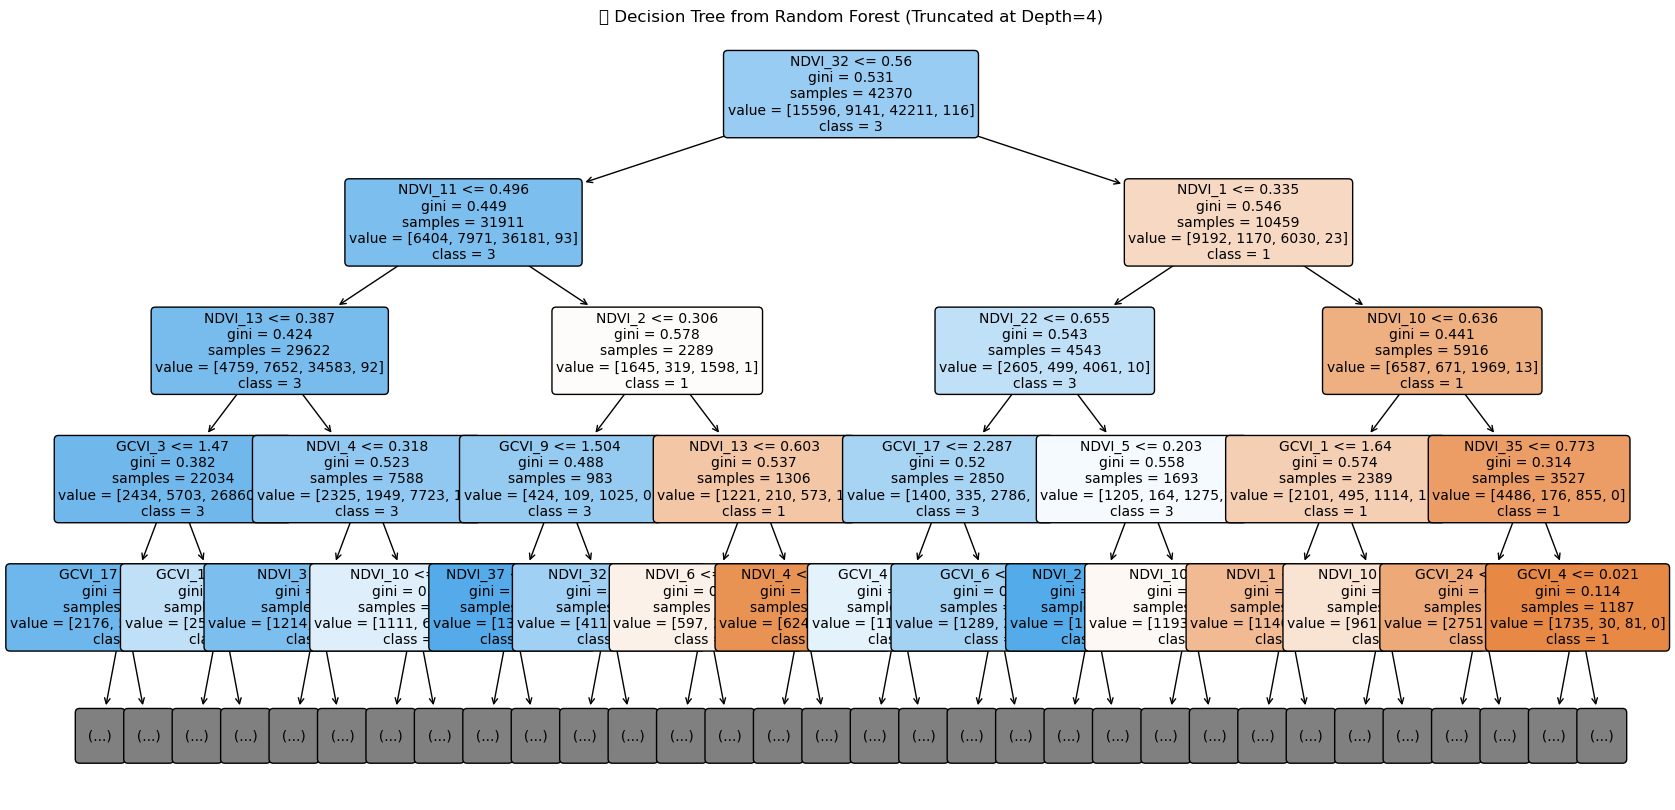

In [8]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Pick one of the trees from the Random Forest
tree = rf_classifier.estimators_[0]  # You can pick any index here (0 to n_estimators - 1)

# OPTIONAL: Print the decision rules as text
tree_rules = export_text(tree, feature_names=list(X_train.columns))
print(tree_rules)

# Plot the tree graphically
plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=list(X_train.columns),
          class_names=[str(cls) for cls in rf_classifier.classes_],
          filled=True, 
          max_depth=4,  # Increase if needed; more depth = more detail
          fontsize=10,
          rounded=True)
plt.title("🧠 Decision Tree from Random Forest (Truncated at Depth=4)")
plt.show()


In [6]:
# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/Across/S2/Results.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Structure"])["Predicted_Structure"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Karnataka_Datasets/Across/Pred.csv", index=False)

# Print the result
print(result)


Predicted_Structure  Crop_Name       Structure     1    2     3   4
0                     Arecanut            Tree   689    2    44   0
1                        Avare           Shrub    16  321   316   0
2                        Bajra      Grass Crop     0    0     4   0
3                       Banana            Tree   152    6    48   0
4                      Coconut            Tree  1235    4   227   0
5                        Guava            Tree   335    5    94   0
6                        Jowar      Grass Crop    41   14   585   0
7                        Lemon            Tree    12    0     3   0
8                        Maize      Grass Crop    68    9   532   0
9                      Mangoes            Tree   688    6   163   0
10                       Onion  Root/Bulb Crop     0    1     4   8
11                       Paddy      Grass Crop    24    1    86   0
12                      Potato  Root/Bulb Crop     2    0     2  10
13                        Ragi      Grass Crop  